## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# The Bread Basket


### Project participants:

* A. Daolin Sheng (ml192ds@leeds.ac.uk)
* B. Student (bstudent@leeds.ac.uk)

# Project Plan

## The Data (10 marks)


This project just contains a dataset and it comes from a Kaggle web-page([The Bread Basket](https://www.kaggle.com/mittalvasu95/the-bread-basket)), and it belongs to "The Bread Basket" a bakery located in Edinburgh. This a sample dataset about online shopping. The dataset includes more than 9000 transactions of customers who order different items from this bakery online from 30-10-2016 to 09-04-2017 and has 20507 entries.

The dataset has 5 columns and they are ‘Transaction’, ‘Item’, ’date_time’, ‘period_day’, ‘weekday_weekend’ respectively. The first column ‘Transaction’ is the transaction id which is unique for each order and ranges from 1 to 9684, and there is not missing column value. The second column name is called ‘Item’ which includes more than 20 different food goods name, such as Bread, Coffee and Jam etc, and there is not missing column value. The third column is the date and time of every transaction, and the format of column value is ‘dd-mm-yyyy hh:mm’. the fourth column value is a period time of one day when a customer places an order and it has two main value ‘morning’ and ‘afternoon’. the last column is called ‘weekday_weekend’ which only has two different values and they represent whether these orders are on weekday or weekend. 

In conclusion, this is a simple business dataset, and There are no missing values in this data set.


## Project Aim and Objectives (5 marks)

This dataset is about the bakery online sales data, so we want to develop a simple system which will contain three main modules. These modules are statistics, search and recommendation respectively and they should help the bakery manager better to operate and manage this bakery and to increase sales. In order to implement this simple system, we can start from the following aims.

The first aim, we want to this system can have a statistic module based on the history data. To specific, we can get we want to get statistic data. For example, the sales volume over a period of time, the percentage of sales of each product or the max sales volume of a day etc, and these statistics data can be easily visualized.

The second aim, we hope this system can have a search module which can return different results based on the different search criteria. By inputting a parameter ‘n’, for instance, we can find the top ‘n’ products in sales volume. 

The last aim is about a recommendation module. This module needs to have a function which can recommend products as accurately as possible to customers based on his/her purchase data. This function will be implemented based on machine learning algorithms.

To sum up, these aims or objects will fulfill the demands of different aspects of a system. The specific objectives following:

### Specific Objective(s)

* __Objective 1:__ Count historical sales volume(daily, monthly).
* __Objective 2:__ Find the top 'n' popular products  in a period of time.
* __Objective 3:__ Recommend product  to customers

## System Design (5 marks)


### Architecture

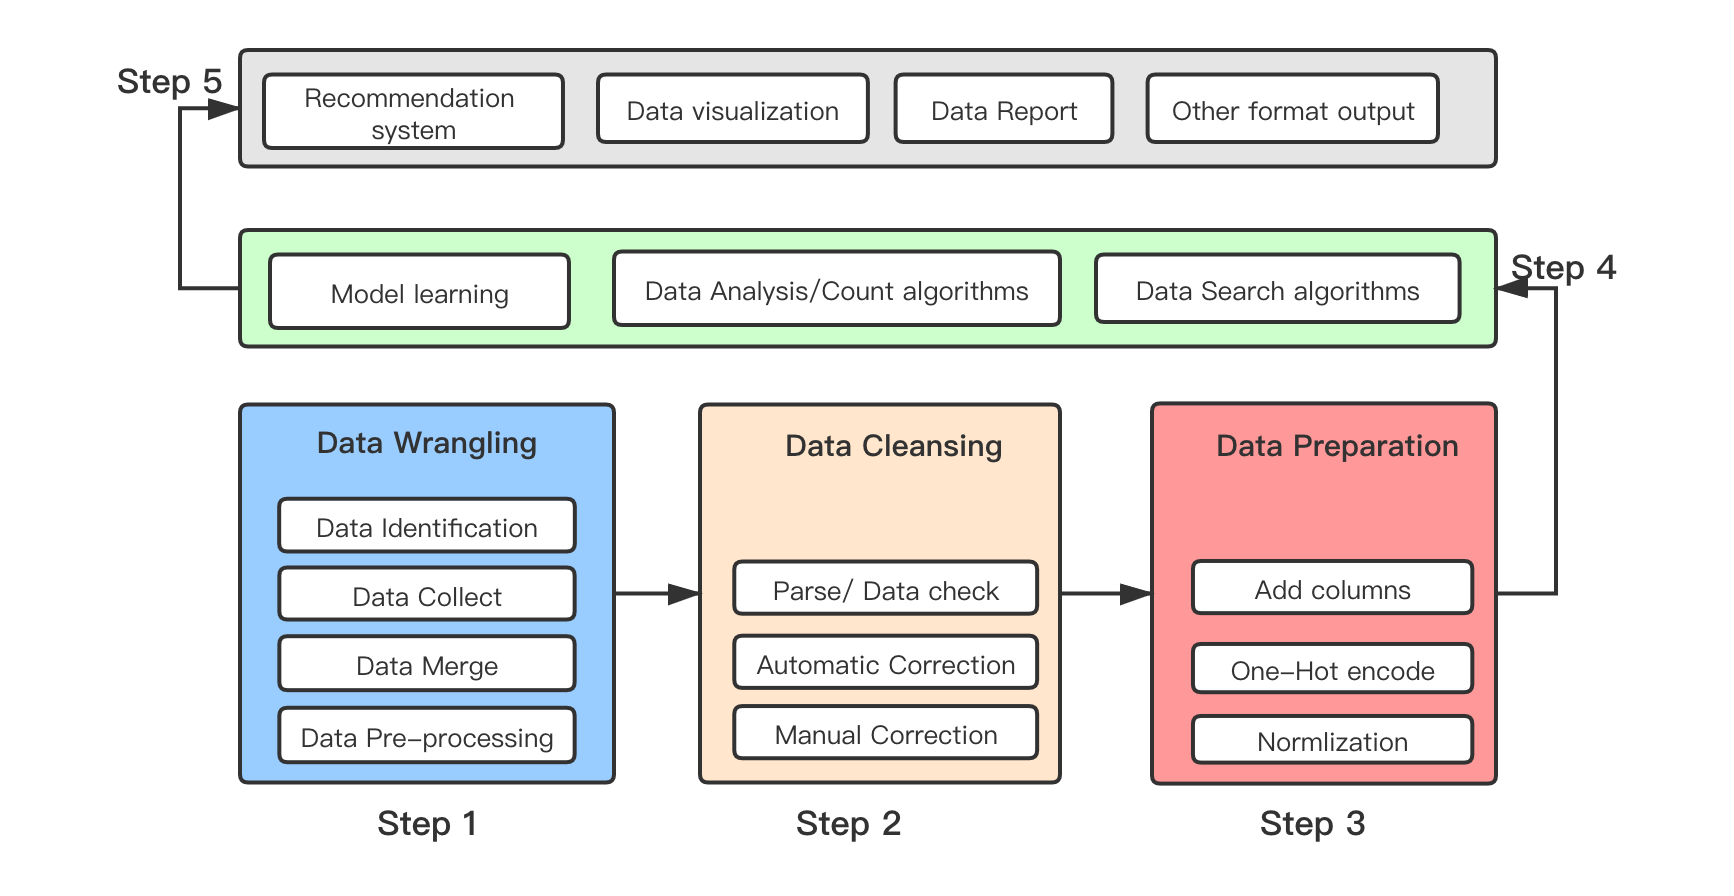

This is a simple architecture of this project and it contains 5 steps to complete this project. Of course, this architecture is a general data science pipeline. The first three steps are data wrangling, data cleansing and data preparation, and they all belong to data engineering. The data wrangling includes identification, collection and combination etc. These are important parts of the data wrangling to prepare for the data cleaning. The next step is data cleansing which can handle the common errors in a dataset and make sure the data set is valid. The third step is data preparation, and there are special tasks, such as one-hot encode, normalization, to prepare for a machine learning algorithm. 

The fourth step mainly uses some algorithms to process data. These algorithms would include search algorithm, count algorithm and recommendation algorithm. The last step can get the result according to the function implemented in the previous step. In this project, the output result would be an items list, or a visual diagram, or a text report.
  
### Processing Modules and Algorithms

* Convert the column date_time to other five different columns(the date_time column will be split into other different five columns)
* Implement an algorithm to find the top n popular items over period of time(this algorithm contains two parameters)
* Convert the dataset into a feature vectors to model learning

# Program Code (15 marks)

Import the some modules needed for this project. Data handling package numpy and pandas and the data visualization module matplotlib and seaborn.

In [10]:
# Import the module numpy, pandas, matplotlib, seaborn to handle and visualize data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Using the pandas `read_csv()` load the dataset and convert the raw dataset into a DataFrame. By using pands built-in function `head()`, `tail()`, `describe()` and `info` get the dataser profile and then do the data cleansing.

In [11]:
# load the dataset into pandas DataFrame.
df = pd.read_csv('./bread_basket_1.csv')
# load the fist 10 entries.
display(df.head(10))
# load the last 10 entries.
display(df.tail(10))
# get the info of the DataFrame.
display(df.info())

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


,Transaction,Item,date_time,period_day,weekday_weekend
20497,9681,Tea,09-04-2017 14:30,afternoon,weekend
20498,9681,Spanish Brunch,09-04-2017 14:30,afternoon,weekend
20499,9681,Christmas common,09-04-2017 14:30,afternoon,weekend
20500,9682,Muffin,09-04-2017 14:32,afternoon,weekend
20501,9682,Tacos/Fajita,09-04-2017 14:32,afternoon,weekend
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend
20506,9684,Smoothies,09-04-2017 15:04,afternoon,weekend


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


None

**By parsing the dataset, because there are not errors in the dataset and there is one dataset in this project, it is not necessary to merge dataset and data cleansing. we diectly entry into the step three 'Data preparation'.**

the following funtion `dataset_datetime_split()` implement the function which split the column into other five different columns.

In [47]:
# The input argument is a pandas DataFrame.
def dataset_datetime_split(df):
    # Formatting the date_time into the right format.
    df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")
    # Getting the date
    df['date']  = df['date_time'].dt.date
    # Getting the time
    df['time']  = df['date_time'].dt.time
    # Getting the ymonth
    df['ymonth'] = df['date_time'].apply(lambda x:x.strftime('%Y-%m'))
    # Getting the month
    df['month'] = df['date_time'].dt.month
    # Replacing the month with text.
    df['month'] = df['month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12), 
             ('January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
    # Getting the weekday
    df['weekday'] = df['date_time'].dt.weekday
    # Replacing the week with text.
    df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
    # Getting the hour
    df['rhour'] = df['date_time'].dt.hour
    # Replacing the hour with different time range text.
    df['rhour'] = df['rhour'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,0),
                                          ('00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', 
                                           '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', 
                                           '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-00'))
    # add a new column
    df['num'] = 1
    
    return df

df = dataset_datetime_split(df)
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,ymonth,month,weekday,rhour,num
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,2016-10,October,Sunday,08-09,1
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,2016-10,October,Sunday,09-10,1
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,2016-10,October,Sunday,09-10,1
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,2016-10,October,Sunday,09-10,1
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,2016-10,October,Sunday,09-10,1
5,3,Cookies,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,2016-10,October,Sunday,09-10,1
6,4,Muffin,2016-10-30 10:08:00,morning,weekend,2016-10-30,10:08:00,2016-10,October,Sunday,09-10,1
7,5,Coffee,2016-10-30 10:13:00,morning,weekend,2016-10-30,10:13:00,2016-10,October,Sunday,09-10,1
8,5,Pastry,2016-10-30 10:13:00,morning,weekend,2016-10-30,10:13:00,2016-10,October,Sunday,09-10,1
9,5,Bread,2016-10-30 10:13:00,morning,weekend,2016-10-30,10:13:00,2016-10,October,Sunday,09-10,1


The following function `daily_sales()` and `monthly_sales()` is countting  the sales respectively.

In [48]:
# Count the sales of every day.
def daily_sales():
    date_list = list(df['date'].apply(lambda x:x.strftime('%Y-%m-%d')))  
    trans_dates = []
    for d in date_list:
        if d not in trans_dates:
            trans_dates.append(d)
    sales_num = []       
    for t in trans_dates:
        num = 0
        for d in date_list:
            if t == d:
                num +=1
        sales_num.append(num)
        
    return trans_dates, sales_num

# Count the sales of every month
def monthly_sales():
    ymonth_list = list(df['ymonth'])   
    trans_months = []
    for d in ymonth_list:
        if d not in trans_months:
            trans_months.append(d)
    sales_num = []       
    for t in trans_months:
        num = 0
        for d in ymonth_list:
            if t == d:
                num +=1
        sales_num.append(num)
        
    return trans_months, sales_num      

The function `top_n_popular_items()` is to implement the function which will return different results based on the different parmeters `n` and `date_range`. For example, if the arguments are '5' and "['09-10-2016', '11-03-2017']", the funciton will return the top 5 popular intems by coustomers liked between 09-10-2016 and 11-03-2017.

In [50]:
import datetime
# 
def top_n_popular_items(n, date_range, df):
    start_date = datetime.datetime.strptime(date_range[0], '%d-%m-%Y').date()
    end_date = datetime.datetime.strptime(date_range[1], '%d-%m-%Y').date()
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    x = df.Item.value_counts().head(n).index
    y = df.Item.value_counts().head(n).values
    
    return x, y

x, y = top_n_popular_items(15, ['10-10-2016', '10-01-2017'], df)
print(x, y)

2016-10-10 2017-01-10
Index(['Coffee', 'Bread', 'Tea', 'Medialuna', 'Pastry', 'Cake',
       'Hot chocolate', 'Sandwich', 'Farm House', 'Muffin', 'Brownie',
       'Cookies', 'Alfajores', 'Scandinavian', 'Juice'],
      dtype='object') [2454 1532  627  391  388  297  283  277  219  216  199  186  186  165
  124]


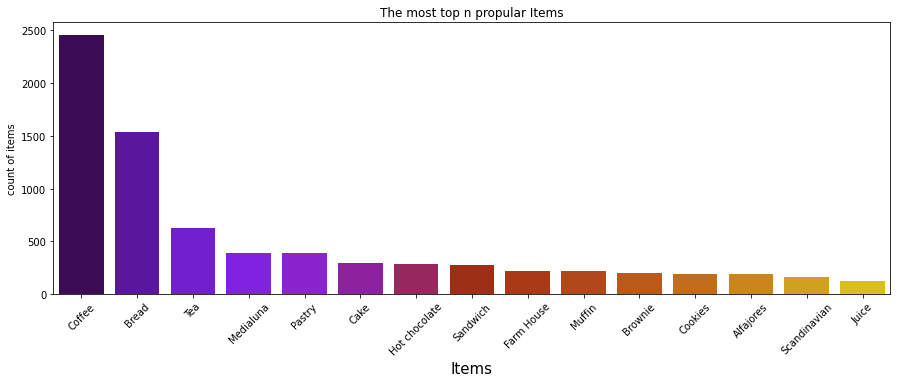

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x, y, palette='gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('count of items')
plt.title('The most top n propular Items', color = 'black')
plt.show()